In [30]:
from IPython.core.display import display, HTML
def view(_df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(HTML(_df.to_html()))

import pandas as pd
df = pd.DataFrame(data={'someText':["This is Ryan's cool horizontal scroller and it will let you scroll for miles and miles and miles and miles and miles and then you can see everything with perfect clarity."]})
view(df)

,someText
0,This is Ryan's cool horizontal scroller and it will let you scroll for miles and miles and miles and miles and miles and then you can see everything with perfect clarity.


In [31]:
import plotly.express as px
import pandas as pd

# load the data
CSV_FILE = '../datasets/employee_turnover.csv'
df = pd.read_csv(CSV_FILE)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Show transposed data
print(df.head(3).T)

                      0          1          2
experience     7.030801  22.965092  15.934292
turnover       1.000000   1.000000   1.000000
gender         1.000000   1.000000   0.000000
age           35.000000  33.000000  35.000000
industry       2.000000   2.000000   8.000000
profession     6.000000   6.000000   6.000000
traffic        4.000000   2.000000   4.000000
coach          1.000000   1.000000   1.000000
head_gender    0.000000   1.000000   1.000000
greywage       1.000000   1.000000   1.000000
way            0.000000   0.000000   0.000000
extraversion   6.200000   6.200000   6.200000
independ       4.100000   4.100000   6.200000
selfcontrol    5.700000   5.700000   2.600000
anxiety        7.100000   7.100000   4.800000
novator        8.300000   8.300000   8.300000


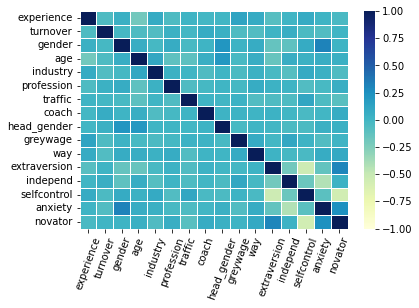

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# get the correlation matrix
corr = df.corr()

ax = sns.heatmap(corr, linewidth=0.5, vmin=-1, vmax=1, cmap="YlGnBu")

plt.xticks(rotation=70)
plt.show()

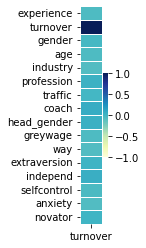

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# get the correlation matrix
corr = df.corr()
plt.figure(figsize = (0.5,4))
ax = sns.heatmap(corr[['turnover']],  
                 linewidth=0.5, vmin=-1, 
                 vmax=1, cmap="YlGnBu")
plt.show()

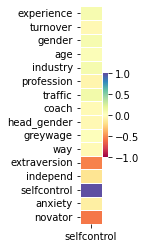

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# get the correlation matrix
corr = df.corr()
plt.figure(figsize = (0.5,4))
ax = sns.heatmap(corr[['selfcontrol']],  
                 linewidth=0.5, vmin=-1, 
                 vmax=1, cmap="Spectral")
plt.show()

In [35]:
import plotly.express as px
import pandas as pd

years       = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
colorado    = [5029196,5029316,5048281,5121771,5193721,5270482,5351218,5452107,
               5540921,5615902,5695564]
conneticut = [3574097,3574147,3579125,3588023,3594395,3594915,3594783,3587509,
               3578674,3573880,3572665]

coloradoDf = pd.DataFrame(data={
    "year":years, "population":colorado
})
coloradoDf['state']="Colorado"

connDf = pd.DataFrame(data={"year":years, "population":conneticut})
connDf['state'] = "Conneticut"
df = coloradoDf.append(connDf)
print(df)

fig = px.line(df, x="year", y="population", color="state" )

fig.update_traces(mode="markers+lines")

fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)

fig.show()

    year  population       state
0   2008     5029196    Colorado
1   2009     5029316    Colorado
2   2010     5048281    Colorado
3   2011     5121771    Colorado
4   2012     5193721    Colorado
5   2013     5270482    Colorado
6   2014     5351218    Colorado
7   2015     5452107    Colorado
8   2016     5540921    Colorado
9   2017     5615902    Colorado
10  2018     5695564    Colorado
0   2008     3574097  Conneticut
1   2009     3574147  Conneticut
2   2010     3579125  Conneticut
3   2011     3588023  Conneticut
4   2012     3594395  Conneticut
5   2013     3594915  Conneticut
6   2014     3594783  Conneticut
7   2015     3587509  Conneticut
8   2016     3578674  Conneticut
9   2017     3573880  Conneticut
10  2018     3572665  Conneticut


In [36]:
import pandas as pd

# load the data
CSV_FILE = '../datasets/employee_turnover.csv'
df       = pd.read_csv(CSV_FILE)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# view the data
print(df)

# get count of employees who have left, grouped by profession
left = df[df['turnover'] == 1].groupby('profession')['profession'].count() \
      .reset_index(name="Left Company")

# get count of employees who have stayed, grouped by profession
stayed = df[df['turnover'] == 0].groupby('profession')['profession'].count() \
        .reset_index(name="Still With Company")
stayed = stayed.set_index('profession')
print("\nStill with company")
print(stayed)

print("\nLeft company")
left = left.set_index('profession')
print(left)

print("\nMerged")
result = pd.merge(left, stayed, on='profession', how='outer')

# Sort by index and replace null values.
result = result.sort_index()
result = result.fillna(0)

# Dropped profession 6 to avoid distorting scale for other professions.
result = result[result.index!=6]
print(result)

      experience  turnover  gender   age  industry  profession  traffic  coach  head_gender  greywage  way  extraversion  independ  selfcontrol  anxiety  novator
0       7.030801         1       1  35.0         2           6        4      1            0         1    0           6.2       4.1          5.7      7.1      8.3
1      22.965092         1       1  33.0         2           6        2      1            1         1    0           6.2       4.1          5.7      7.1      8.3
2      15.934292         1       0  35.0         8           6        4      1            1         1    0           6.2       6.2          2.6      4.8      8.3
3      15.934292         1       0  35.0         8           6        4      1            1         1    0           5.4       7.6          4.9      2.5      6.7
4       8.410678         1       1  32.0        10           2        7      2            0         1    0           3.0       4.1          8.0      7.1      3.7
...          ...       ...  

In [37]:
import plotly.express as px

# create the stacked bar chart
fig = px.bar(result,
             x=result.index,
             # specify columns to use for the stacked bars
             y=[ "Still With Company", "Left Company"],
             title="Turnover By Profession",
             )

# adjust layout properties of the figure
fig.update_layout(
    yaxis=dict(title="Number of Employees"),
    xaxis=dict(title="Profession"),
    width=600,
    height=550,
        hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
# show the stacked bar chart
fig.show()

In [38]:
import pandas as pd

# load the data
CSV_FILE = '../datasets/employee_turnover.csv'
df       = pd.read_csv(CSV_FILE)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# view the data
print(df)

# get count of employees who have left, grouped by gender
left = df[df['turnover'] == 1].groupby('gender')['gender'].count() \
      .reset_index(name="Left Company")

# get count of employees who have stayed, grouped by gender
stayed = df[df['turnover'] == 0].groupby('gender')['gender'].count() \
        .reset_index(name="Still With Company")
stayed = stayed.set_index('gender')
print("\nStill with company")
print(stayed)

print("\nLeft company")
left = left.set_index('gender')
print(left)

print("\nMerged")
result = pd.merge(left, stayed, on='gender', how='outer')

# Sort by index and replace null values.
result = result.sort_index()
result = result.fillna(0)

print(result)

      experience  turnover  gender   age  industry  profession  traffic  coach  head_gender  greywage  way  extraversion  independ  selfcontrol  anxiety  novator
0       7.030801         1       1  35.0         2           6        4      1            0         1    0           6.2       4.1          5.7      7.1      8.3
1      22.965092         1       1  33.0         2           6        2      1            1         1    0           6.2       4.1          5.7      7.1      8.3
2      15.934292         1       0  35.0         8           6        4      1            1         1    0           6.2       6.2          2.6      4.8      8.3
3      15.934292         1       0  35.0         8           6        4      1            1         1    0           5.4       7.6          4.9      2.5      6.7
4       8.410678         1       1  32.0        10           2        7      2            0         1    0           3.0       4.1          8.0      7.1      3.7
...          ...       ...  

In [39]:
import plotly.express as px

# create the stacked bar chart
fig = px.bar(result,
             x=result.index,
             # specify columns to use for the stacked bars
             y=[ "Still With Company", "Left Company"],
             title="Turnover By Profession",
             )

# adjust layout properties of the figure
fig.update_layout(
    yaxis=dict(title="Number of Employees"),
    xaxis=dict(title="Gender"),
    width=600,
    height=550,
        hoverlabel=dict(
        bgcolor="yellow",
        font_size=16,
        font_family="Rockwell"
    )
)
# show the stacked bar chart
fig.show()

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# load the data
PATH     = '../datasets/'
CSV_FILE = 'employee_turnover.csv'
df       = pd.read_csv(PATH + CSV_FILE)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# create 1 by 2 figure of 2 subplots
fig = make_subplots(rows=1, cols=2,
                    # indicate the position of the first plot
                    start_cell="bottom-left",
                    subplot_titles=["Age", "Gender"])

# create histograms and add them to the figure
fig.add_trace(go.Histogram(
    x=df['age'],
    name='Age',
    marker=dict(color='crimson'),           
    xbins=dict(start=0, end=100, size=0.1)),  # define bins
    row=1, col=1)

fig.add_trace(go.Histogram(
    x=df['gender'],
    name='Gender',
    marker=dict(color='royalblue'),
    xbins=dict(start=0, end=2, size=0.1)),
    row=1, col=2)

# Update x-axis properties
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_xaxes(title_text="Gender", row=1, col=2)

# Update y-axis properties
fig.update_yaxes(title_text="Number of Employees", row=1, col=1)
fig.update_yaxes(title_text="Number of Employees", row=1, col=2)

# show the histograms
fig.show()

In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# load the data
PATH     = '../datasets/'
CSV_FILE = 'babysamp-98.txt'
df = pd.read_csv(PATH + CSV_FILE, skiprows=1, sep='\t', names=("MomAge", "DadAge", "MomEduc", "MomMarital",
                                                        "numlive", "dobmm", "gestation", "sex", "weight",
                                                        "prenatalstart", "orig.id", "preemie"))
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# create 1 by 3 figure of 3 subplots
fig = make_subplots(rows=1, cols=3,
                    # indicate the position of the first plot
                    start_cell="bottom-left",
                    subplot_titles=["Mom Age", "Mom Education", "Mom Married"])

# create histograms and add them to the figure
fig.add_trace(go.Histogram(
    x=df['MomAge'],
    name='Mom Age',
    marker=dict(color='crimson'),           
    xbins=dict(start=0, end=100, size=0.1)),  # define bins
    row=1, col=1)

fig.add_trace(go.Histogram(
    x=df['MomEduc'],
    name='Mom Education',
    marker=dict(color='royalblue'),
    xbins=dict(start=0, end=100, size=0.1)),
    row=1, col=2)

fig.add_trace(go.Histogram(
    x=df['MomMarital'],
    name='Mom Married',
    marker=dict(color='green'),
    xbins=dict(start=0, end=3, size=0.1)),
    row=1, col=3)

# Update x-axis properties
fig.update_xaxes(title_text="Mom Age", row=1, col=1)
fig.update_xaxes(title_text="Mom Education", row=1, col=2)

# Update y-axis properties
fig.update_yaxes(title_text="Number of Babies", row=1, col=1)
fig.update_yaxes(title_text="Number of Babies", row=1, col=2)
fig.update_yaxes(title_text="Number of Babies", row=1, col=3)

# show the histograms
fig.show()

In [42]:
import pandas  as pd
import numpy   as np
import plotly.express as px

# Setup data.
candidates = {'gmat': [780,750,690,710,680,730,690,720,
 740,690,610,690,710,680,770,610,580,650,540,590,620,
 600,550,550,570,670,660,580,650,660,640,620,660,660,
 680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,
 3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,
 3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,
 3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,
 1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,
 5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,
 1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,
 0,0,1]}

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa',
                                       'work_experience','admitted'])
print(df)

fig_3d = px.scatter_3d(df, x="gpa", y="work_experience", z="gmat", color="admitted")

fig_3d.show()

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         1
3    710  3.7                5         1
4    680  3.9                4         1
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         1
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         0
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# load the data
CSV_FILE = '../datasets/employee_turnover.csv'
df       = pd.read_csv(CSV_FILE)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

def highlight_greater_than_5(column):
    if column.selfcontrol > 5.0:
        return ['background-color: yellow']
    else:
        return ['background-color: white']

df.head(5).style.background_gradient(cmap='Oranges', subset=['experience']).apply(highlight_greater_than_5, axis=1, subset=["selfcontrol"])

,experience,turnover,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.000000,2,6,4,1,0,1,0,6.200000,4.100000,5.700000,7.100000,8.300000
1,22.965092,1,1,33.000000,2,6,2,1,1,1,0,6.200000,4.100000,5.700000,7.100000,8.300000
2,15.934292,1,0,35.000000,8,6,4,1,1,1,0,6.200000,6.200000,2.600000,4.800000,8.300000
3,15.934292,1,0,35.000000,8,6,4,1,1,1,0,5.400000,7.600000,4.900000,2.500000,6.700000
4,8.410678,1,1,32.000000,10,2,7,2,0,1,0,3.000000,4.100000,8.000000,7.100000,3.700000


In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# load the data
CSV_FILE = '../datasets/employee_turnover.csv'
df       = pd.read_csv(CSV_FILE)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

def highlight_cell(column):
    if column.anxiety < 3.0:
        return ['background-color: green']
    elif column.anxiety > 7:
        return ['background-color: red']
    else:
        return ['background-color: yellow']

df.head(5).style.background_gradient(cmap='plasma', subset=['extraversion', 'independ']).apply(highlight_cell, axis=1, subset=["anxiety"])

,experience,turnover,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.000000,2,6,4,1,0,1,0,6.200000,4.100000,5.700000,7.100000,8.300000
1,22.965092,1,1,33.000000,2,6,2,1,1,1,0,6.200000,4.100000,5.700000,7.100000,8.300000
2,15.934292,1,0,35.000000,8,6,4,1,1,1,0,6.200000,6.200000,2.600000,4.800000,8.300000
3,15.934292,1,0,35.000000,8,6,4,1,1,1,0,5.400000,7.600000,4.900000,2.500000,6.700000
4,8.410678,1,1,32.000000,10,2,7,2,0,1,0,3.000000,4.100000,8.000000,7.100000,3.700000


In [49]:
from plotly.subplots import make_subplots
import pandas as pd

# load the data
CSV_FILE = '../datasets/employee_turnover.csv'
df = pd.read_csv(CSV_FILE)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df.iloc[:10].style.bar(subset=["experience", "extraversion","selfcontrol","independ"], color='#00ff00')

,experience,turnover,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.000000,2,6,4,1,0,1,0,6.200000,4.100000,5.700000,7.100000,8.300000
1,22.965092,1,1,33.000000,2,6,2,1,1,1,0,6.200000,4.100000,5.700000,7.100000,8.300000
2,15.934292,1,0,35.000000,8,6,4,1,1,1,0,6.200000,6.200000,2.600000,4.800000,8.300000
3,15.934292,1,0,35.000000,8,6,4,1,1,1,0,5.400000,7.600000,4.900000,2.500000,6.700000
4,8.410678,1,1,32.000000,10,2,7,2,0,1,0,3.000000,4.100000,8.000000,7.100000,3.700000
5,8.969199,1,0,42.000000,14,6,2,2,1,1,0,6.200000,6.200000,4.100000,5.600000,6.700000
6,8.969199,1,0,42.000000,14,6,2,2,1,1,0,6.200000,6.200000,4.100000,5.600000,6.700000
7,120.443532,1,0,28.000000,10,6,6,1,1,1,0,3.800000,5.500000,8.000000,4.000000,4.400000
8,8.607803,1,0,29.000000,2,6,2,1,0,1,0,8.600000,6.900000,2.600000,4.000000,7.500000
9,4.435318,1,0,30.000000,4,9,7,2,1,1,0,5.400000,5.500000,3.300000,7.900000,8.300000


In [51]:
import pandas as pd

# load the data
CSV_FILE = '../datasets/employee_turnover.csv'
df = pd.read_csv(CSV_FILE)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

def bold_red(val):
    bold = ''
    if val >0:
        bold = 'bold'
    return 'font-weight: %s' % bold

def color_negative_red(value):
    color = 'red'

    if value == 0:
        color = 'blue'
    return 'color: %s' % color

df.head(5).style.applymap(color_negative_red, subset=['gender']).applymap(bold_red, subset=['gender'])

,experience,turnover,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.000000,2,6,4,1,0,1,0,6.200000,4.100000,5.700000,7.100000,8.300000
1,22.965092,1,1,33.000000,2,6,2,1,1,1,0,6.200000,4.100000,5.700000,7.100000,8.300000
2,15.934292,1,0,35.000000,8,6,4,1,1,1,0,6.200000,6.200000,2.600000,4.800000,8.300000
3,15.934292,1,0,35.000000,8,6,4,1,1,1,0,5.400000,7.600000,4.900000,2.500000,6.700000
4,8.410678,1,1,32.000000,10,2,7,2,0,1,0,3.000000,4.100000,8.000000,7.100000,3.700000


In [53]:
import pandas as pd

# load the data
CSV_FILE = '../datasets/employee_turnover.csv'
df = pd.read_csv(CSV_FILE)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

def bold_red(val):
    bold = ''
    if val < 5:
        bold = 'bold'
    return 'font-weight: %s' % bold

def color_extraversion_independ(value):
    if value < 5:
        return 'color: red'
    elif value > 7:
        return 'color: green'
    else:
        return 'color: yellow'

df.head(5).style.applymap(color_extraversion_independ, subset=['extraversion', 'independ']).applymap(bold_red, subset=['extraversion', 'independ'])

,experience,turnover,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.000000,2,6,4,1,0,1,0,6.200000,4.100000,5.700000,7.100000,8.300000
1,22.965092,1,1,33.000000,2,6,2,1,1,1,0,6.200000,4.100000,5.700000,7.100000,8.300000
2,15.934292,1,0,35.000000,8,6,4,1,1,1,0,6.200000,6.200000,2.600000,4.800000,8.300000
3,15.934292,1,0,35.000000,8,6,4,1,1,1,0,5.400000,7.600000,4.900000,2.500000,6.700000
4,8.410678,1,1,32.000000,10,2,7,2,0,1,0,3.000000,4.100000,8.000000,7.100000,3.700000
